# Колличество женщин и мужчин

In [60]:
import pandas as pd
data = pd.read_csv(open('C:\\Users\\todosuk\\Desktop\\train.csv'))
sex = data.groupby(['Sex'])['PassengerId'].count()
sex


Sex
female    314
male      577
Name: PassengerId, dtype: int64

# Какой части пассажиров удалось выжить?

In [61]:
import pandas as pd
data = pd.read_csv(open('C:\\Users\\todosuk\\Desktop\\train.csv'))
survived = (data[data.Survived == 1]).groupby(['Survived'])['PassengerId'].count()
survived= (survived * 100)/sum(data.groupby(['Survived'])['PassengerId'].count())
survived.round(2)

Survived
1    38.38
Name: PassengerId, dtype: float64

# Какую долю пассажиры первого класса составляли среди всех пассажиров? 

In [62]:
import pandas as pd
data = pd.read_csv(open('C:\\Users\\todosuk\\Desktop\\train.csv'))
first_class = (data[data.Pclass==1]).groupby(['Pclass'])['PassengerId'].count()
first_class = (first_class*100)/sum(data.groupby(['Survived'])['PassengerId'].count())
first_class.round(2)

Pclass
1    24.24
Name: PassengerId, dtype: float64

# Какого возраста были пассажиры?

Посчитайте среднее и медиану возраста пассажиров. В качестве ответа приведите два числа через пробел.

In [63]:
import pandas as pd
data = pd.read_csv(open('C:\\Users\\todosuk\\Desktop\\train.csv'))
mean_age = data['Age'].mean()
median_age = data['Age'].median()
print("Средний возраст пассажиров")
print(mean_age)
print("Медиана возраста")
print(median_age)



Средний возраст пассажиров
29.69911764705882
Медиана возраста
28.0


# Коррелируют ли число братьев/сестер/супругов с числом родителей/детей? 

Посчитайте корреляцию Пирсона между признаками SibSp и Parch.

In [64]:
import pandas as pd
data = pd.read_csv(open('C:\\Users\\todosuk\\Desktop\\train.csv'))
corr_pearson = data['SibSp'].corr(data['Parch'], method='pearson', min_periods=1)
print("Коэффициент кореляции Пирсона")
print(corr_pearson)
print("Согласно таблице Чердока это умеренная связь")
print( "менее 0.3- слабая, от 0.3 до 0.5- умеренная, от 0.5 до 0.7- заметная, от 0.7 до 0.9- высокая, более 0.9- весьма высокая")

Коэффициент кореляции Пирсона
0.41483769862015646
Согласно таблице Чердока это умеренная связь
менее 0.3- слабая, от 0.3 до 0.5- умеренная, от 0.5 до 0.7- заметная, от 0.7 до 0.9- высокая, более 0.9- весьма высокая


# Какое самое популярное женское имя на корабле?

In [65]:
import pandas as pd
import re
data = pd.read_csv(open('C:\\Users\\todosuk\\Desktop\\train.csv'))
fn = data[data['Sex'] == 'female']['Name']

def extract_first_name(name):
    m = re.search(".*\\((.*)\\).*", name)
    if m is not None:
        return m.group(1).split(" ")[0]
    # первое слово после Mrs. or Miss. or else
    m1 = re.search(".*\\. ([A-Za-z]*)", name)
    return m1.group(1)
# получаем имя с максимальной частотой
r = fn.map(lambda full_name: extract_first_name(full_name)).value_counts().idxmax()
print(r)




Anna


In [66]:
sample = data[['Pclass','Fare','Age', 'Sex','Survived']]# Создаем новый датафрайм с нужными столбцами
sample = sample.replace(to_replace=['male', 'female'], value=[0, 1])# Заменяем male на 0, female на 1
print ('Male = 0, female = 1')
sample = sample.dropna()# Удаляем объекты содержащие NaN
sample.head(10)

Male = 0, female = 1


,Pclass,Fare,Age,Sex,Survived
0,3,7.2500,22.0,0,0
1,1,71.2833,38.0,1,1
2,3,7.9250,26.0,1,1
3,1,53.1000,35.0,1,1
4,3,8.0500,35.0,0,0
6,1,51.8625,54.0,0,0
7,3,21.0750,2.0,0,0
8,3,11.1333,27.0,1,1
9,2,30.0708,14.0,1,1
10,3,16.7000,4.0,1,1


In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = sample[['Pclass','Fare','Age', 'Sex']] # Убираем колонку survived из датасета (это целевая переменная)
scaler.fit(X)
X_scaler = scaler.transform(X)
y = sample.Survived #Выделяем целевую переменную

# Оценка важности признаков

# SelectKBest

[105.77986827  55.17948762   4.27119493 291.28748519]


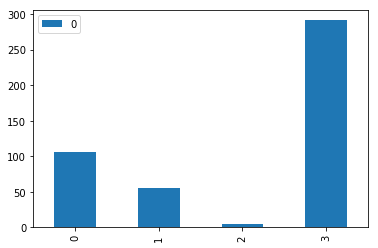

In [75]:
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
import matplotlib.pyplot as plt

selector = SelectKBest(f_classif, k=4)
selector.fit(X,y)
scores = selector.scores_
print(scores)
scores_new = pd.DataFrame(scores)
scores_new.plot(kind='bar')
plt.show()


In [42]:
from sklearn.model_selection import StratifiedKFold, KFold

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
cv.split(X_scaler, y)

<generator object _BaseKFold.split at 0x000001A43130FFC0>

# KNeighborsClassifier:

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

alg_ngbh = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(alg_ngbh, X_scaler,y, cv=cv, n_jobs=-1)
print("Accuracy (k-neighbors): {}/{}".format(scores.mean(), scores.std()))

Accuracy (k-neighbors): 0.8053197551463782/0.009929271572341575


# SGDClassifier:

In [81]:
from sklearn.linear_model import SGDClassifier

alg_sgd = SGDClassifier(random_state=1)
scores = cross_val_score(alg_sgd, X_scaler, y, cv=cv, n_jobs=-1)
print("Accuracy (sgd): {}/{}".format(scores.mean(), scores.std()))

Accuracy (sgd): 0.766027244893332/0.024087654178274055


# SVC:

In [82]:
from sklearn.svm import SVC
alg_svm = SVC(C=1.0)
scores = cross_val_score(alg_svm, X_scaler, y, cv=cv, n_jobs=-1)
print("Accuracy (svm): {}/{}".format(scores.mean(), scores.std()))

Accuracy (svm): 0.795421627154119/0.028226538937966523


# GaussianNB:

In [83]:
from sklearn.naive_bayes import GaussianNB

alg_nbs = GaussianNB()
scores = cross_val_score(alg_nbs, X_scaler, y, cv=cv, n_jobs=-1)
print("Accuracy (naive bayes): {}/{}".format(scores.mean(), scores.std()))

Accuracy (naive bayes): 0.7688399866063685/0.024700239897185103


# RandomForestClassifier:

In [84]:
from sklearn.ensemble import RandomForestClassifier

alg_frst = RandomForestClassifier(random_state=1, n_estimators=400, min_samples_split=10, min_samples_leaf=1)
scores = cross_val_score(alg_frst, X_scaler, y, cv=cv, n_jobs=-1)
print("Accuracy (random forest): {}/{}".format(scores.mean(), scores.std()))

Accuracy (random forest): 0.8305006376612755/0.020966988016515795


# Выбор наилучших параметров алгоритма

In [ ]:
from sklearn.model_selection import GridSearchCV

alg_frst_model = RandomForestClassifier(random_state=1)
alg_frst_params = [{
    "n_estimators": [350, 400, 450],
    "min_samples_split": [6, 8, 10],
    "min_samples_leaf": [1, 2, 4],
}]
alg_frst_grid = GridSearchCV(alg_frst_model, alg_frst_params, cv=cv, refit=True, verbose=1, n_jobs=-1)
alg_frst_grid.fit(X_scaler, y)
alg_frst_best = alg_frst_grid.best_estimator_
print("Accuracy (random forest auto): {} with params {}"
      .format(alg_frst_grid.best_score_, alg_frst_grid.best_params_))

Fitting 3 folds for each of 1296 candidates, totalling 3888 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.5min


In [90]:
from sklearn.model_selection import RandomizedSearchCV

alg_frst_grid = RandomizedSearchCV(alg_frst_model, param_dist, cv=cv, refit=True, verbose=1, n_jobs=-1)
param_dist = {"max_depth": [1, 5],
              "max_features": [1,2,3,4],
              "min_samples_leaf": [1,2,3,4,5,6,7,8, 9],
              "criterion": ["gini", "entropy"],
              }
alg_frst_grid.fit(X_scaler,y)
alg_frst_best = alg_frst_grid.best_estimator_
print("Accuracy (random forest auto): {} with params {}"
      .format(alg_frst_grid.best_score_, alg_frst_grid.best_params_))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   11.3s finished


Accuracy (random forest auto): 0.8235294117647058 with params {'n_estimators': 400, 'min_samples_leaf': 2, 'max_features': 3, 'max_depth': 5, 'criterion': 'gini'}
